$$\color{blue}{\text{{\huge Script for ICA Analysis}}}$$

### Load Libraries and Modules

In [1]:
#Import necessary libraries and modules
import mne
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from scipy import signal
import array
matplotlib.use('Qt5Agg')

### Load files

In [37]:
# List contents of the directory
directory_path = '/home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings'
files = os.listdir(directory_path)
file_name1='Rec3.fif'
file_name2='Rec8.fif'
file1=os.path.join(directory_path,file_name1)
file2=os.path.join(directory_path,file_name2)
raw1 = mne.io.read_raw_fif(file1, preload=True)
raw2 = mne.io.read_raw_fif(file2, preload=True)

Opening raw data file /home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings/Rec3.fif...


/tmp/ipykernel_7949/2333299114.py:8: RuntimeWarning: This filename (/home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings/Rec3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw1 = mne.io.read_raw_fif(file1, preload=True)


Isotrak not found
    Range : 0 ... 1003199 =      0.000 ...   200.640 secs
Ready.
Reading 0 ... 1003199  =      0.000 ...   200.640 secs...
Opening raw data file /home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings/Rec8.fif...


/tmp/ipykernel_7949/2333299114.py:9: RuntimeWarning: This filename (/home/rakshita/rds_folders/Sproject1/EmptyRoom/Recordings/Rec8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw2 = mne.io.read_raw_fif(file2, preload=True)


Isotrak not found
    Range : 0 ... 901799 =      0.000 ...   180.360 secs
Ready.
Reading 0 ... 901799  =      0.000 ...   180.360 secs...


## Filtering

Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/home/rakshita/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


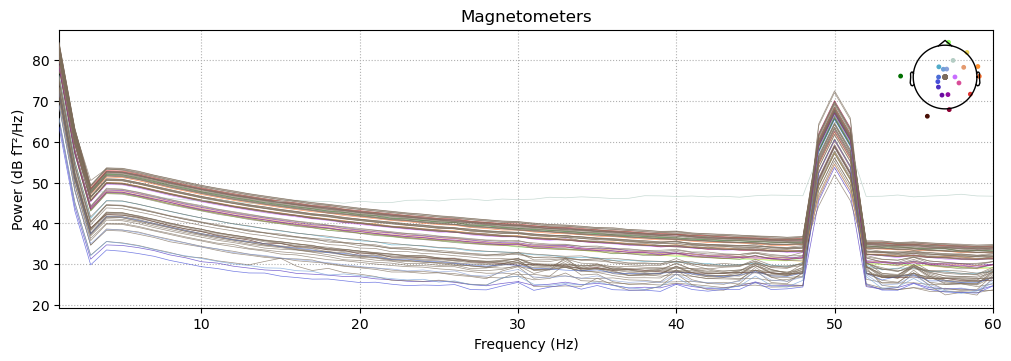

In [38]:
## PSD plot of original data (first)
%matplotlib inline  
raw1.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=5000, n_overlap=2500).plot(average=False, amplitude=False, picks="data", exclude="bads");

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.5s


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/home/rakshita/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


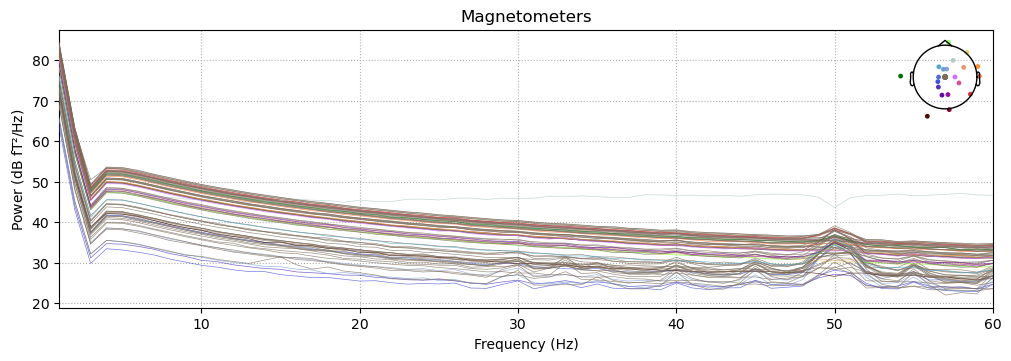

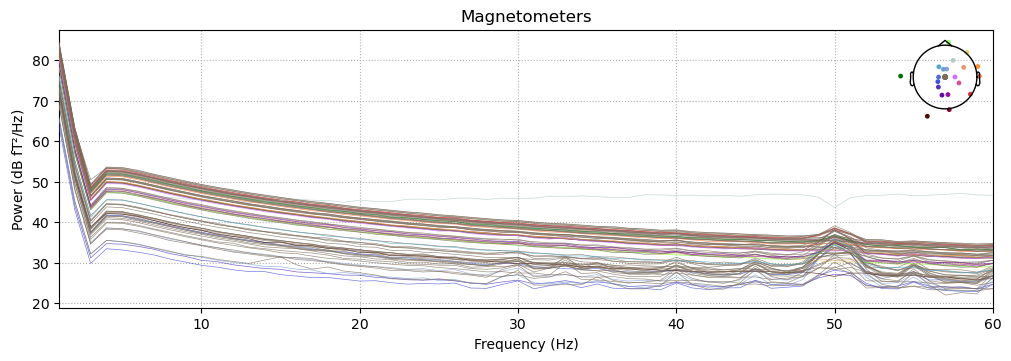

In [39]:
## Notch Filtering for First Data
%matplotlib inline  
meg_picks = mne.pick_types(raw1.info, meg=True)
freqs = (50, 100, 150, 200)
raw1_notch = raw1.copy().notch_filter(freqs=freqs, picks=meg_picks)
raw1_notch.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=5000, n_overlap=2500).plot(average=False, amplitude=False, picks="data", exclude="bads")


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/home/rakshita/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


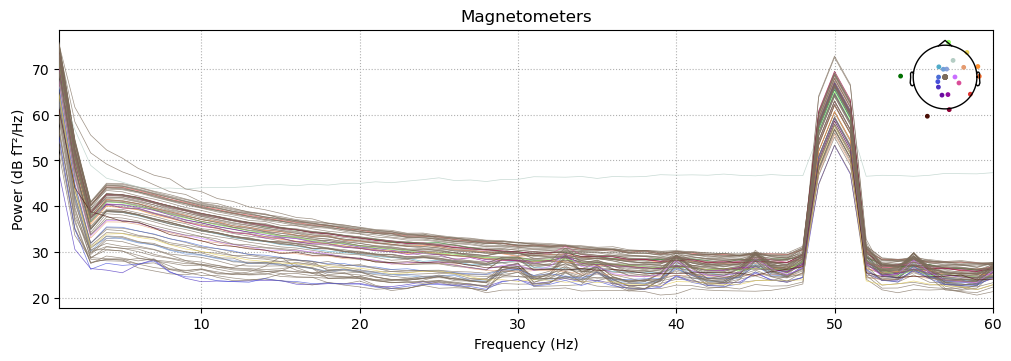

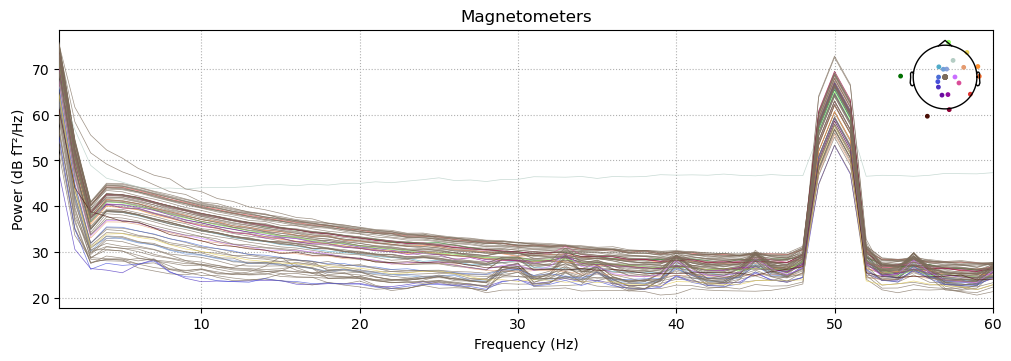

In [40]:
## PSD plot of original data (second)
raw2.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=5000, n_overlap=2500).plot(average=False, amplitude=False, picks="data", exclude="bads")

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.4s


Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


/home/rakshita/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


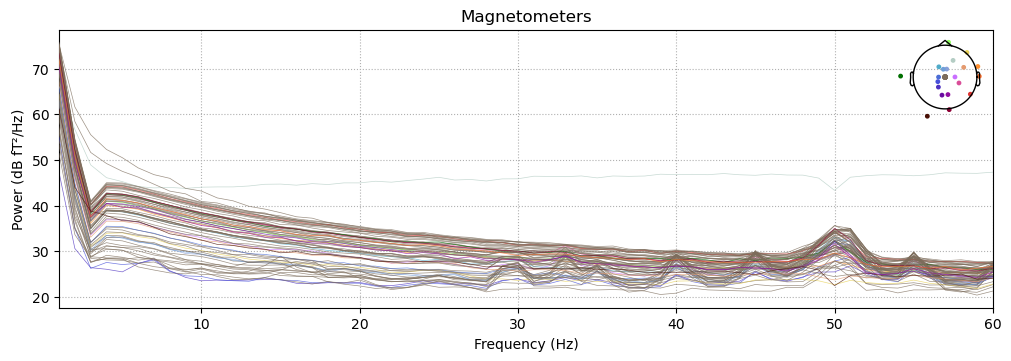

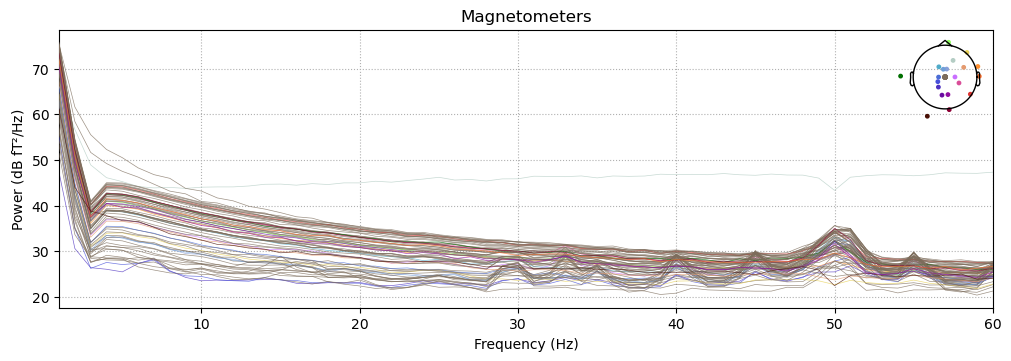

In [41]:
## Notch Filtering for Second Data
meg_picks = mne.pick_types(raw2.info, meg=True)
freqs = (50, 100, 150, 200)
raw2_notch = raw2.copy().notch_filter(freqs=freqs, picks=meg_picks)
raw2_notch.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=5000, n_overlap=2500).plot(average=False, amplitude=False, picks="data", exclude="bads")


### High Pass Filtering

In [42]:
high_pass_cutoff = 0.1  # Hz

meg_picks1 = mne.pick_types(raw1_notch.info, meg=True)
meg_picks2 = mne.pick_types(raw2_notch.info, meg=True)
# Apply the high-pass filter to the data
raw1_high_pass = raw1_notch.copy().filter(l_freq=high_pass_cutoff, h_freq=None, picks=meg_picks1)
raw2_high_pass=raw2_notch.copy().filter(l_freq=high_pass_cutoff, h_freq=None, picks=meg_picks2)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 165001 samples (33.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.9s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 165001 samples (33.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.9s


### Create ICA Objects

In [43]:
# Initialize ICA object
ica1 = ICA(n_components=20, random_state=95, max_iter='auto')
ica2 = ICA(n_components=20, random_state=95, max_iter='auto')

In [44]:
## Fit ICA
ica1.fit(raw1_high_pass)
ica2.fit(raw2_high_pass)

Fitting ICA to data using 72 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 43.3s.
Fitting ICA to data using 72 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 15.8s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,23 iterations on raw data (901800 samples)
ICA components,20
Available PCA components,72
Channel types,mag
ICA components marked for exclusion,—


In [45]:
ica_sources1 = ica1.get_sources(raw1_high_pass)
ica_data1 = ica_sources1.get_data()

In [46]:
ica_sources2 = ica2.get_sources(raw2_high_pass)
ica_data2 = ica_sources2.get_data()

## Amplitude and Phase based correlation

Pairwise Phase Correlation Matrix:
[[-1.03004865e-01 -4.17849985e-02 -5.53931797e-03  4.48750038e-02
   3.00145232e-02  2.28163006e-03  3.75428463e-03 -8.52557921e-03
   5.09059286e-02 -2.23384955e-02 -4.99835336e-02 -3.84505941e-02
   3.67931047e-02 -2.25996899e-03 -8.62702914e-02  5.40118063e-02
  -3.44931084e-02  7.38125221e-02  4.84957573e-03  8.95591594e-03]
 [-1.81830309e-02 -1.89029967e-02  1.52735546e-03  5.93631039e-02
  -3.39881846e-02 -6.50240044e-03  1.91836469e-02 -2.49836100e-03
   6.51325537e-04  3.58214889e-02 -6.26499232e-02  8.78987332e-02
   3.21078925e-02  8.09237003e-02 -9.61137196e-03  6.08843135e-02
  -1.42954020e-02  2.63901536e-02  1.34571395e-02 -2.52338815e-02]
 [ 1.56407998e-02 -1.84606293e-02 -1.26630129e-02  7.15491391e-02
   8.66412029e-02  2.77810008e-02  1.40056093e-02  1.87739600e-02
  -4.97887931e-02 -1.95524343e-03 -2.99088829e-02  3.59091435e-02
   4.04068925e-02  3.85667420e-03 -7.54509292e-02  2.28509073e-02
   2.74910259e-03  9.70907839e-02 -2.11

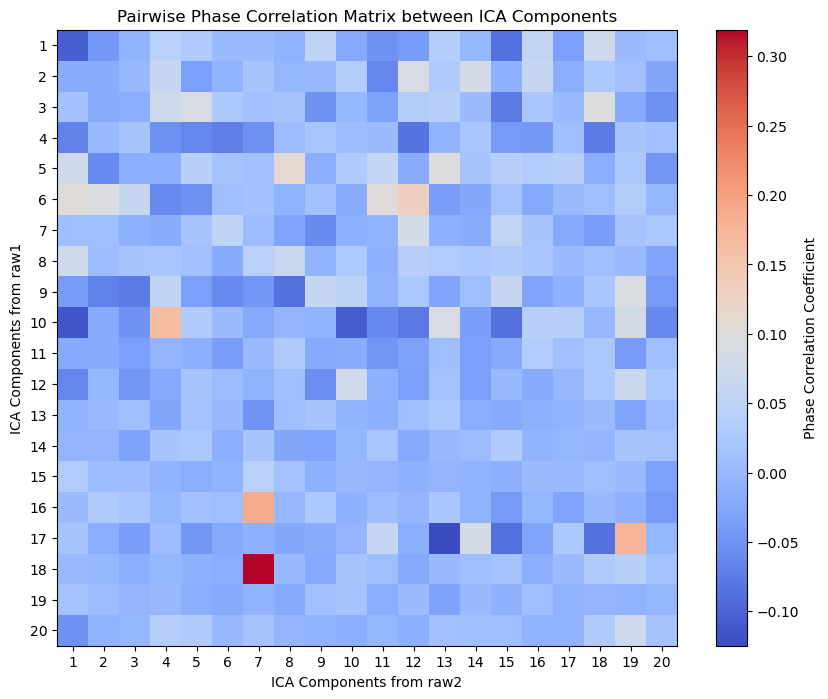

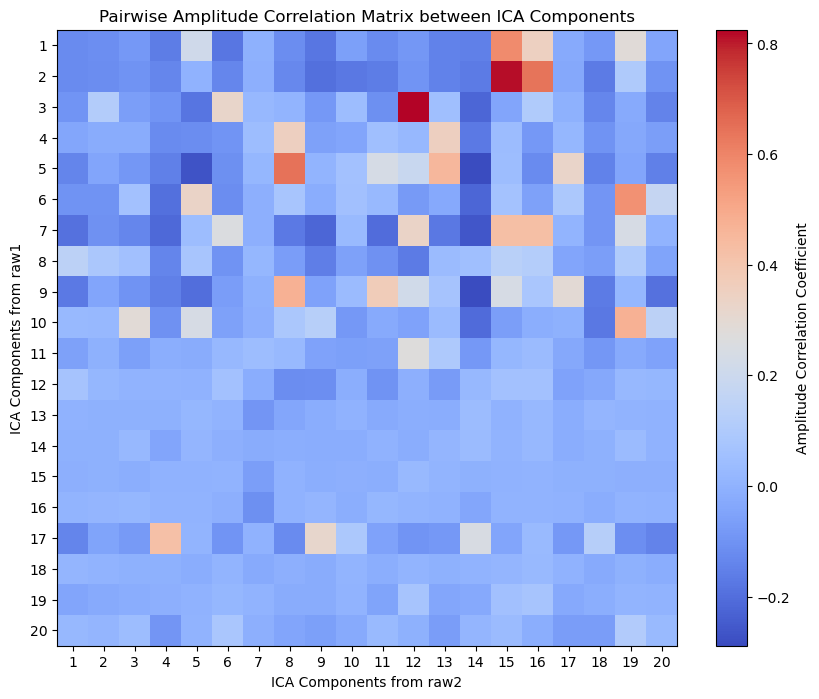

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import pearsonr


# Find the number of components (should be the same for both ICA results)
n_components1 = ica_data1.shape[0]
n_components2 = ica_data2.shape[0]

# Truncate both datasets to the same length if they are not already
min_length = min(ica_data1.shape[1], ica_data2.shape[1])
ica_data1_truncated = ica_data1[:, :min_length]
ica_data2_truncated = ica_data2[:, :min_length]

# Compute the Hilbert transform to obtain the analytic signal
analytic_signal1 = hilbert(ica_data1_truncated)
analytic_signal2 = hilbert(ica_data2_truncated)

# Extract the phase of the analytic signal
phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)

# Extract the amplitude envelope of the analytic signal
amplitude1 = np.abs(analytic_signal1)
amplitude2 = np.abs(analytic_signal2)

# Initialize matrices to store phase and amplitude correlation coefficients
phase_correlations = np.zeros((n_components1, n_components2))
amplitude_correlations = np.zeros((n_components1, n_components2))

# Compute pairwise correlations between all components of ica_data1 and ica_data2
for i in range(n_components1):
    for j in range(n_components2):
        # Compute phase correlation
        phase_corr, _ = pearsonr(phase1[i], phase2[j])
        phase_correlations[i, j] = phase_corr

        # Compute amplitude correlation
        amp_corr, _ = pearsonr(amplitude1[i], amplitude2[j])
        amplitude_correlations[i, j] = amp_corr

# Display phase correlation matrix
print("Pairwise Phase Correlation Matrix:")
print(phase_correlations)

# Display amplitude correlation matrix
print("Pairwise Amplitude Correlation Matrix:")
print(amplitude_correlations)

# Plotting the phase correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(phase_correlations, cmap='coolwarm', aspect='auto', interpolation='none')
plt.colorbar(label='Phase Correlation Coefficient')
plt.title('Pairwise Phase Correlation Matrix between ICA Components')
plt.xlabel('ICA Components from raw2')
plt.ylabel('ICA Components from raw1')
plt.xticks(range(n_components2), range(1, n_components2 + 1))
plt.yticks(range(n_components1), range(1, n_components1 + 1))
plt.show()

# Plotting the amplitude correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(amplitude_correlations, cmap='coolwarm', aspect='auto', interpolation='none')
plt.colorbar(label='Amplitude Correlation Coefficient')
plt.title('Pairwise Amplitude Correlation Matrix between ICA Components')
plt.xlabel('ICA Components from raw2')
plt.ylabel('ICA Components from raw1')
plt.xticks(range(n_components2), range(1, n_components2 + 1))
plt.yticks(range(n_components1), range(1, n_components1 + 1))
plt.show()


### Plot Single Component

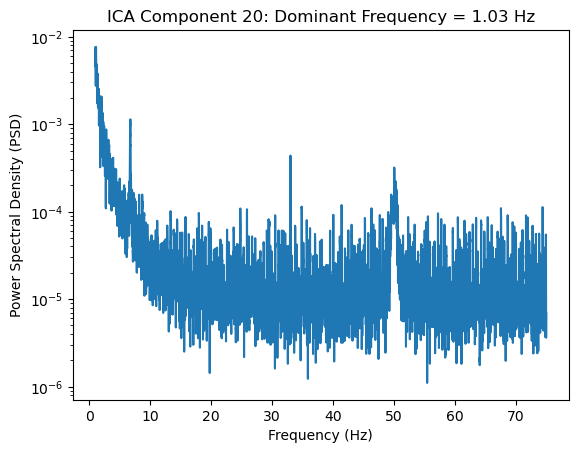

In [50]:
## Frequency plot of the ICA Components
ica_idx=19
ica_data = ica2.get_sources(raw2_high_pass).get_data()[ica_idx]

# Calculate the PSD using MNE's function
psd, freqs = mne.time_frequency.psd_array_multitaper(ica_data, sfreq=raw2_high_pass.info['sfreq'], fmin=1, fmax=75, adaptive=True, normalization='full', verbose=0)

# Find the peak frequency
dominant_freq = freqs[np.argmax(psd)]
    
# Plot the PSD
plt.figure()
plt.semilogy(freqs, psd)
plt.title(f'ICA Component {ica_idx + 1}: Dominant Frequency = {dominant_freq:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.show()

### Compare Components

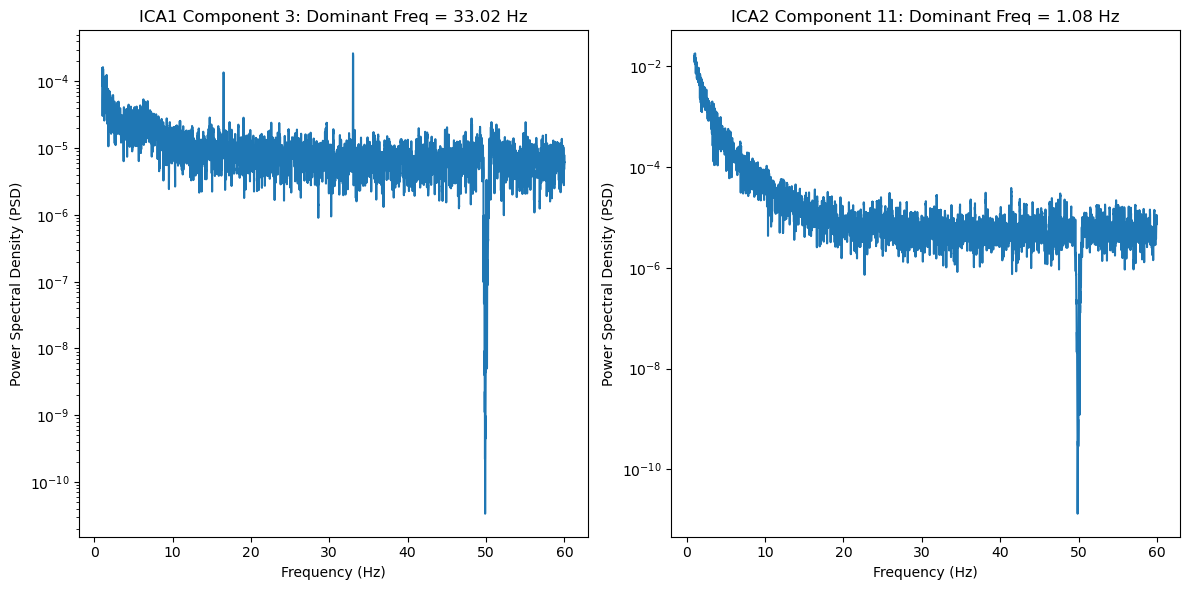

In [51]:
## ICA Component frequency comparison

import mne
import numpy as np
import matplotlib.pyplot as plt

# Define ICA components to plot
ica1_idx = 2  # Component index for ica1
ica2_idx = 10  # Component index for ica2 (change to desired component)

# Extract ICA data for the specified components
ica1_data = ica1.get_sources(raw1_high_pass).get_data()[ica1_idx]
ica2_data = ica2.get_sources(raw2_high_pass).get_data()[ica2_idx]

# Sampling frequency
sfreq1 = raw1_high_pass.info['sfreq']
sfreq2 = raw2_high_pass.info['sfreq']

# Frequency range for PSD
fmin, fmax = 1, 60

# Calculate the PSD for ica1 component
psd1, freqs1 = mne.time_frequency.psd_array_multitaper(
    ica1_data, sfreq=sfreq1, fmin=fmin, fmax=fmax, adaptive=True, normalization='full', verbose=0
)

# Calculate the PSD for ica2 component
psd2, freqs2 = mne.time_frequency.psd_array_multitaper(
    ica2_data, sfreq=sfreq2, fmin=fmin, fmax=fmax, adaptive=True, normalization='full', verbose=0
)

# Find the dominant frequencies
dominant_freq1 = freqs1[np.argmax(psd1)]
dominant_freq2 = freqs2[np.argmax(psd2)]

# Plot the PSDs side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for ica1 component
ax[0].semilogy(freqs1, psd1)
ax[0].set_title(f'ICA1 Component {ica1_idx + 1}: Dominant Freq = {dominant_freq1:.2f} Hz')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Power Spectral Density (PSD)')

# Plot for ica2 component
ax[1].semilogy(freqs2, psd2)
ax[1].set_title(f'ICA2 Component {ica2_idx + 1}: Dominant Freq = {dominant_freq2:.2f} Hz')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Power Spectral Density (PSD)')

plt.tight_layout()
plt.show()


### Find Max Correlation Co-ef and > 0.5

In [49]:
# Find the maximum correlation value and its index for phase correlations
max_phase_corr = np.max(phase_correlations)
max_phase_index = np.unravel_index(np.argmax(phase_correlations), phase_correlations.shape)

print(f"Highest Phase Correlation: {max_phase_corr:.2f} between Component {max_phase_index[0] + 1} of ica_data1 and Component {max_phase_index[1] + 1} of ica_data2")

# Find components with phase correlation greater than 0.5
phase_corr_greater_05 = np.argwhere(phase_correlations > 0.5)

print("\nPhase Correlations Greater than 0.5:")
for idx in phase_corr_greater_05:
    comp1, comp2 = idx
    print(f"Component {comp1 + 1} of ica_data1 and Component {comp2 + 1} of ica_data2: Correlation = {phase_correlations[comp1, comp2]:.2f}")

# Find the maximum correlation value and its index for amplitude correlations
max_amplitude_corr = np.max(amplitude_correlations)
max_amplitude_index = np.unravel_index(np.argmax(amplitude_correlations), amplitude_correlations.shape)

print(f"\nHighest Amplitude Correlation: {max_amplitude_corr:.2f} between Component {max_amplitude_index[0] + 1} of ica_data1 and Component {max_amplitude_index[1] + 1} of ica_data2")

# Find components with amplitude correlation greater than 0.5
amplitude_corr_greater_05 = np.argwhere(amplitude_correlations > 0.5)

print("\nAmplitude Correlations Greater than 0.5:")
for idx in amplitude_corr_greater_05:
    comp1, comp2 = idx
    print(f"Component {comp1 + 1} of ica_data1 and Component {comp2 + 1} of ica_data2: Correlation = {amplitude_correlations[comp1, comp2]:.2f}")


Highest Phase Correlation: 0.32 between Component 18 of ica_data1 and Component 7 of ica_data2

Phase Correlations Greater than 0.5:

Highest Amplitude Correlation: 0.82 between Component 3 of ica_data1 and Component 12 of ica_data2

Amplitude Correlations Greater than 0.5:
Component 1 of ica_data1 and Component 15 of ica_data2: Correlation = 0.58
Component 2 of ica_data1 and Component 15 of ica_data2: Correlation = 0.81
Component 2 of ica_data1 and Component 16 of ica_data2: Correlation = 0.64
Component 3 of ica_data1 and Component 12 of ica_data2: Correlation = 0.82
Component 5 of ica_data1 and Component 8 of ica_data2: Correlation = 0.64
Component 6 of ica_data1 and Component 19 of ica_data2: Correlation = 0.56


## Scatter Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `ica_data1` and `ica_data2` are numpy arrays or similar data structures
# Each should have shape (n_components, n_samples1) and (n_components, n_samples2)

# Find the number of components (should be the same for both ICA results)
n_components = min(ica_data1.shape[0], ica_data2.shape[0])

# Find the shorter length between the two datasets
min_length = min(ica_data1.shape[1], ica_data2.shape[1])

# Truncate both ICA datasets to the shorter length
ica_data1_truncated = ica_data1[:, :min_length]
ica_data2_truncated = ica_data2[:, :min_length]

# Create a figure for plotting
fig, axes = plt.subplots(n_components, figsize=(15, n_components * 3))

# Plot each component from truncated ica_data1 against the corresponding component in truncated ica_data2
for i in range(n_components):
    axes[i].scatter(ica_data1_truncated[i], ica_data2_truncated[i], alpha=0.5)
    axes[i].set_title(f'Component {i + 1} Comparison')
    axes[i].set_xlabel('ICA Component from raw1 (Truncated)')
    axes[i].set_ylabel('ICA Component from raw2 (Truncated)')

plt.tight_layout()
plt.show()


## Bar plot of pairwise correlation co-efficents

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assume `ica_data1` and `ica_data2` are numpy arrays of shape (n_components, n_samples1) and (n_components, n_samples2)
# We have already truncated or interpolated to ensure the same length if necessary

# Find the number of components (should be the same for both ICA results)
n_components = min(ica_data1.shape[0], ica_data2.shape[0])

# Truncate both datasets to the same length if they are not already
min_length = min(ica_data1.shape[1], ica_data2.shape[1])
ica_data1_truncated = ica_data1[:, :min_length]
ica_data2_truncated = ica_data2[:, :min_length]

# Initialize a list to store correlation coefficients
correlations = []

# Compute pairwise Pearson correlation coefficients for each component
for i in range(n_components):
    corr, _ = pearsonr(ica_data1_truncated[i], ica_data2_truncated[i])
    correlations.append(corr)

# Convert correlations list to numpy array
correlations = np.array(correlations)

# Display correlation coefficients
print("Pairwise Correlation Coefficients between ICA components:")
for i, corr in enumerate(correlations):
    print(f"Component {i + 1}: {corr:.2f}")

# Optional: Plotting the correlation coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), correlations)
plt.xlabel('ICA Component')
plt.ylabel('Pearson Correlation Coefficient')
plt.title('Pairwise Correlation Coefficients between ICA Components')
plt.show()


## Barplot of Phase based correlation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import pearsonr

# Assume `ica_data1` and `ica_data2` are numpy arrays of shape (n_components, n_samples1) and (n_components, n_samples2)
# We have already truncated or interpolated to ensure the same length if necessary

# Find the number of components (should be the same for both ICA results)
n_components = min(ica_data1.shape[0], ica_data2.shape[0])

# Truncate both datasets to the same length if they are not already
min_length = min(ica_data1.shape[1], ica_data2.shape[1])
ica_data1_truncated = ica_data1[:, :min_length]
ica_data2_truncated = ica_data2[:, :min_length]

# Initialize a list to store phase correlation coefficients
phase_correlations = []

# Compute the Hilbert transform to obtain the analytic signal
analytic_signal1 = hilbert(ica_data1_truncated)
analytic_signal2 = hilbert(ica_data2_truncated)

# Extract the phase of the analytic signal
phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)

# Compute pairwise Pearson correlation coefficients for the phases of each component
for i in range(n_components):
    phase_corr, _ = pearsonr(phase1[i], phase2[i])
    phase_correlations.append(phase_corr)

# Convert phase correlations list to numpy array
phase_correlations = np.array(phase_correlations)

# Display phase correlation coefficients
print("Pairwise Phase Correlation Coefficients between ICA components:")
for i, phase_corr in enumerate(phase_correlations):
    print(f"Component {i + 1}: {phase_corr:.2f}")

# Optional: Plotting the phase correlation coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), phase_correlations)
plt.xlabel('ICA Component')
plt.ylabel('Phase Correlation Coefficient')
plt.title('Pairwise Phase Correlation Coefficients between ICA Components')
plt.show()


## Phase based Correlation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.stats import pearsonr

# Assume `ica_data1` and `ica_data2` are numpy arrays of shape (n_components1, n_samples1) and (n_components2, n_samples2)
# We have already truncated or interpolated to ensure the same length if necessary

# Find the number of components in each dataset
n_components1 = ica_data1.shape[0]
n_components2 = ica_data2.shape[0]

# Truncate both datasets to the same length if they are not already
min_length = min(ica_data1.shape[1], ica_data2.shape[1])
ica_data1_truncated = ica_data1[:, :min_length]
ica_data2_truncated = ica_data2[:, :min_length]

# Compute the Hilbert transform to obtain the analytic signal
analytic_signal1 = hilbert(ica_data1_truncated)
analytic_signal2 = hilbert(ica_data2_truncated)

# Extract the phase of the analytic signal
phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)

# Initialize a matrix to store phase correlation coefficients
phase_correlation_matrix = np.zeros((n_components1, n_components2))

# Compute pairwise Pearson correlation coefficients for the phases of each component
for i in range(n_components1):
    for j in range(n_components2):
        phase_corr, _ = pearsonr(phase1[i], phase2[j])
        phase_correlation_matrix[i, j] = phase_corr

# Display phase correlation matrix
print("Phase Correlation Matrix:")
print(phase_correlation_matrix)

# Optional: Plotting the phase correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(phase_correlation_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Phase Correlation Coefficient')
plt.xlabel('ICA Components from raw2')
plt.ylabel('ICA Components from raw1')
plt.title('Pairwise Phase Correlation Matrix between ICA Components')
plt.xticks(ticks=np.arange(n_components2), labels=[f'Comp {j+1}' for j in range(n_components2)])
plt.yticks(ticks=np.arange(n_components1), labels=[f'Comp {i+1}' for i in range(n_components1)])
plt.show()


In [ ]:
# Find the maximum correlation value and its index for phase correlations
max_phase_corr = np.max(phase_correlations)
max_phase_index = np.unravel_index(np.argmax(phase_correlations), phase_correlations.shape)

print(f"Highest Phase Correlation: {max_phase_corr:.2f} between Component {max_phase_index[0] + 1} of ica_data1 and Component {max_phase_index[1] + 1} of ica_data2")

# Find the maximum correlation value and its index for amplitude correlations
max_amplitude_corr = np.max(amplitude_correlations)
max_amplitude_index = np.unravel_index(np.argmax(amplitude_correlations), amplitude_correlations.shape)

print(f"Highest Amplitude Correlation: {max_amplitude_corr:.2f} between Component {max_amplitude_index[0] + 1} of ica_data1 and Component {max_amplitude_index[1] + 1} of ica_data2")
